In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [53]:
def plot_rewards_with_std(rewards_dict):
    """
    绘制多个数据集的均值和标准差曲线，并在同一张图上展示。

    参数:
    rewards_dict (dict): 一个字典，其中键为数据集名称，值为形状为 (n_runs, n_rounds) 的数组。
                         每个数组表示多个训练的奖励记录。
    """
    # 设置高分辨率图表
    plt.figure(figsize=(12, 8), dpi=300)

    # 为每个数据集绘制均值和标准差
    for key, env_avg_rewards in rewards_dict.items():
        # 计算均值和方差
        mean_rewards = np.mean(env_avg_rewards, axis=0)
        std_rewards = np.std(env_avg_rewards, axis=0)
        
        # 绘制均值曲线
        plt.plot(mean_rewards, label=f'Mean Reward ({key})', linewidth=2)
        
        # 添加方差阴影
        plt.fill_between(range(len(mean_rewards)), 
                         mean_rewards - std_rewards, 
                         mean_rewards + std_rewards, 
                         alpha=0.2)

    # 添加图例和标签
#     y_limit=-240
#     plt.axhline(y=y_limit, color='red', linestyle='--', linewidth=2, label=f'Model Free')
    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Average Rewards with Standard Deviation for Different EnsNums', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # 美化图表
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()


    # 显示图表
    plt.show()

# Baseline H Env Ens Num Comparison

In [25]:
ensNum1_avg_log = np.load("Res_H_Env_Pen/EnvAvg_FMRL_Baseline_EnsNumEachClient=1.npy")
ensNum3_avg_log = np.load("Res_H_Env_Pen/EnvAvg_FMRL_Baseline_EnsNumEachClient=3.npy")
envMixed_log = np.load("Res_H_Env_Pen/MixedEnv_FMRL_Baseline_EnsNum=3.npy")

rewardsEnsComparison ={
    "Ensembel model num = 1 each Env": ensNum1_avg_log,
    "Ensembel model num = 3 each Env": ensNum3_avg_log,
    "Mixed Env(Ensembel model num = 3)":envMixed_log,
    
}

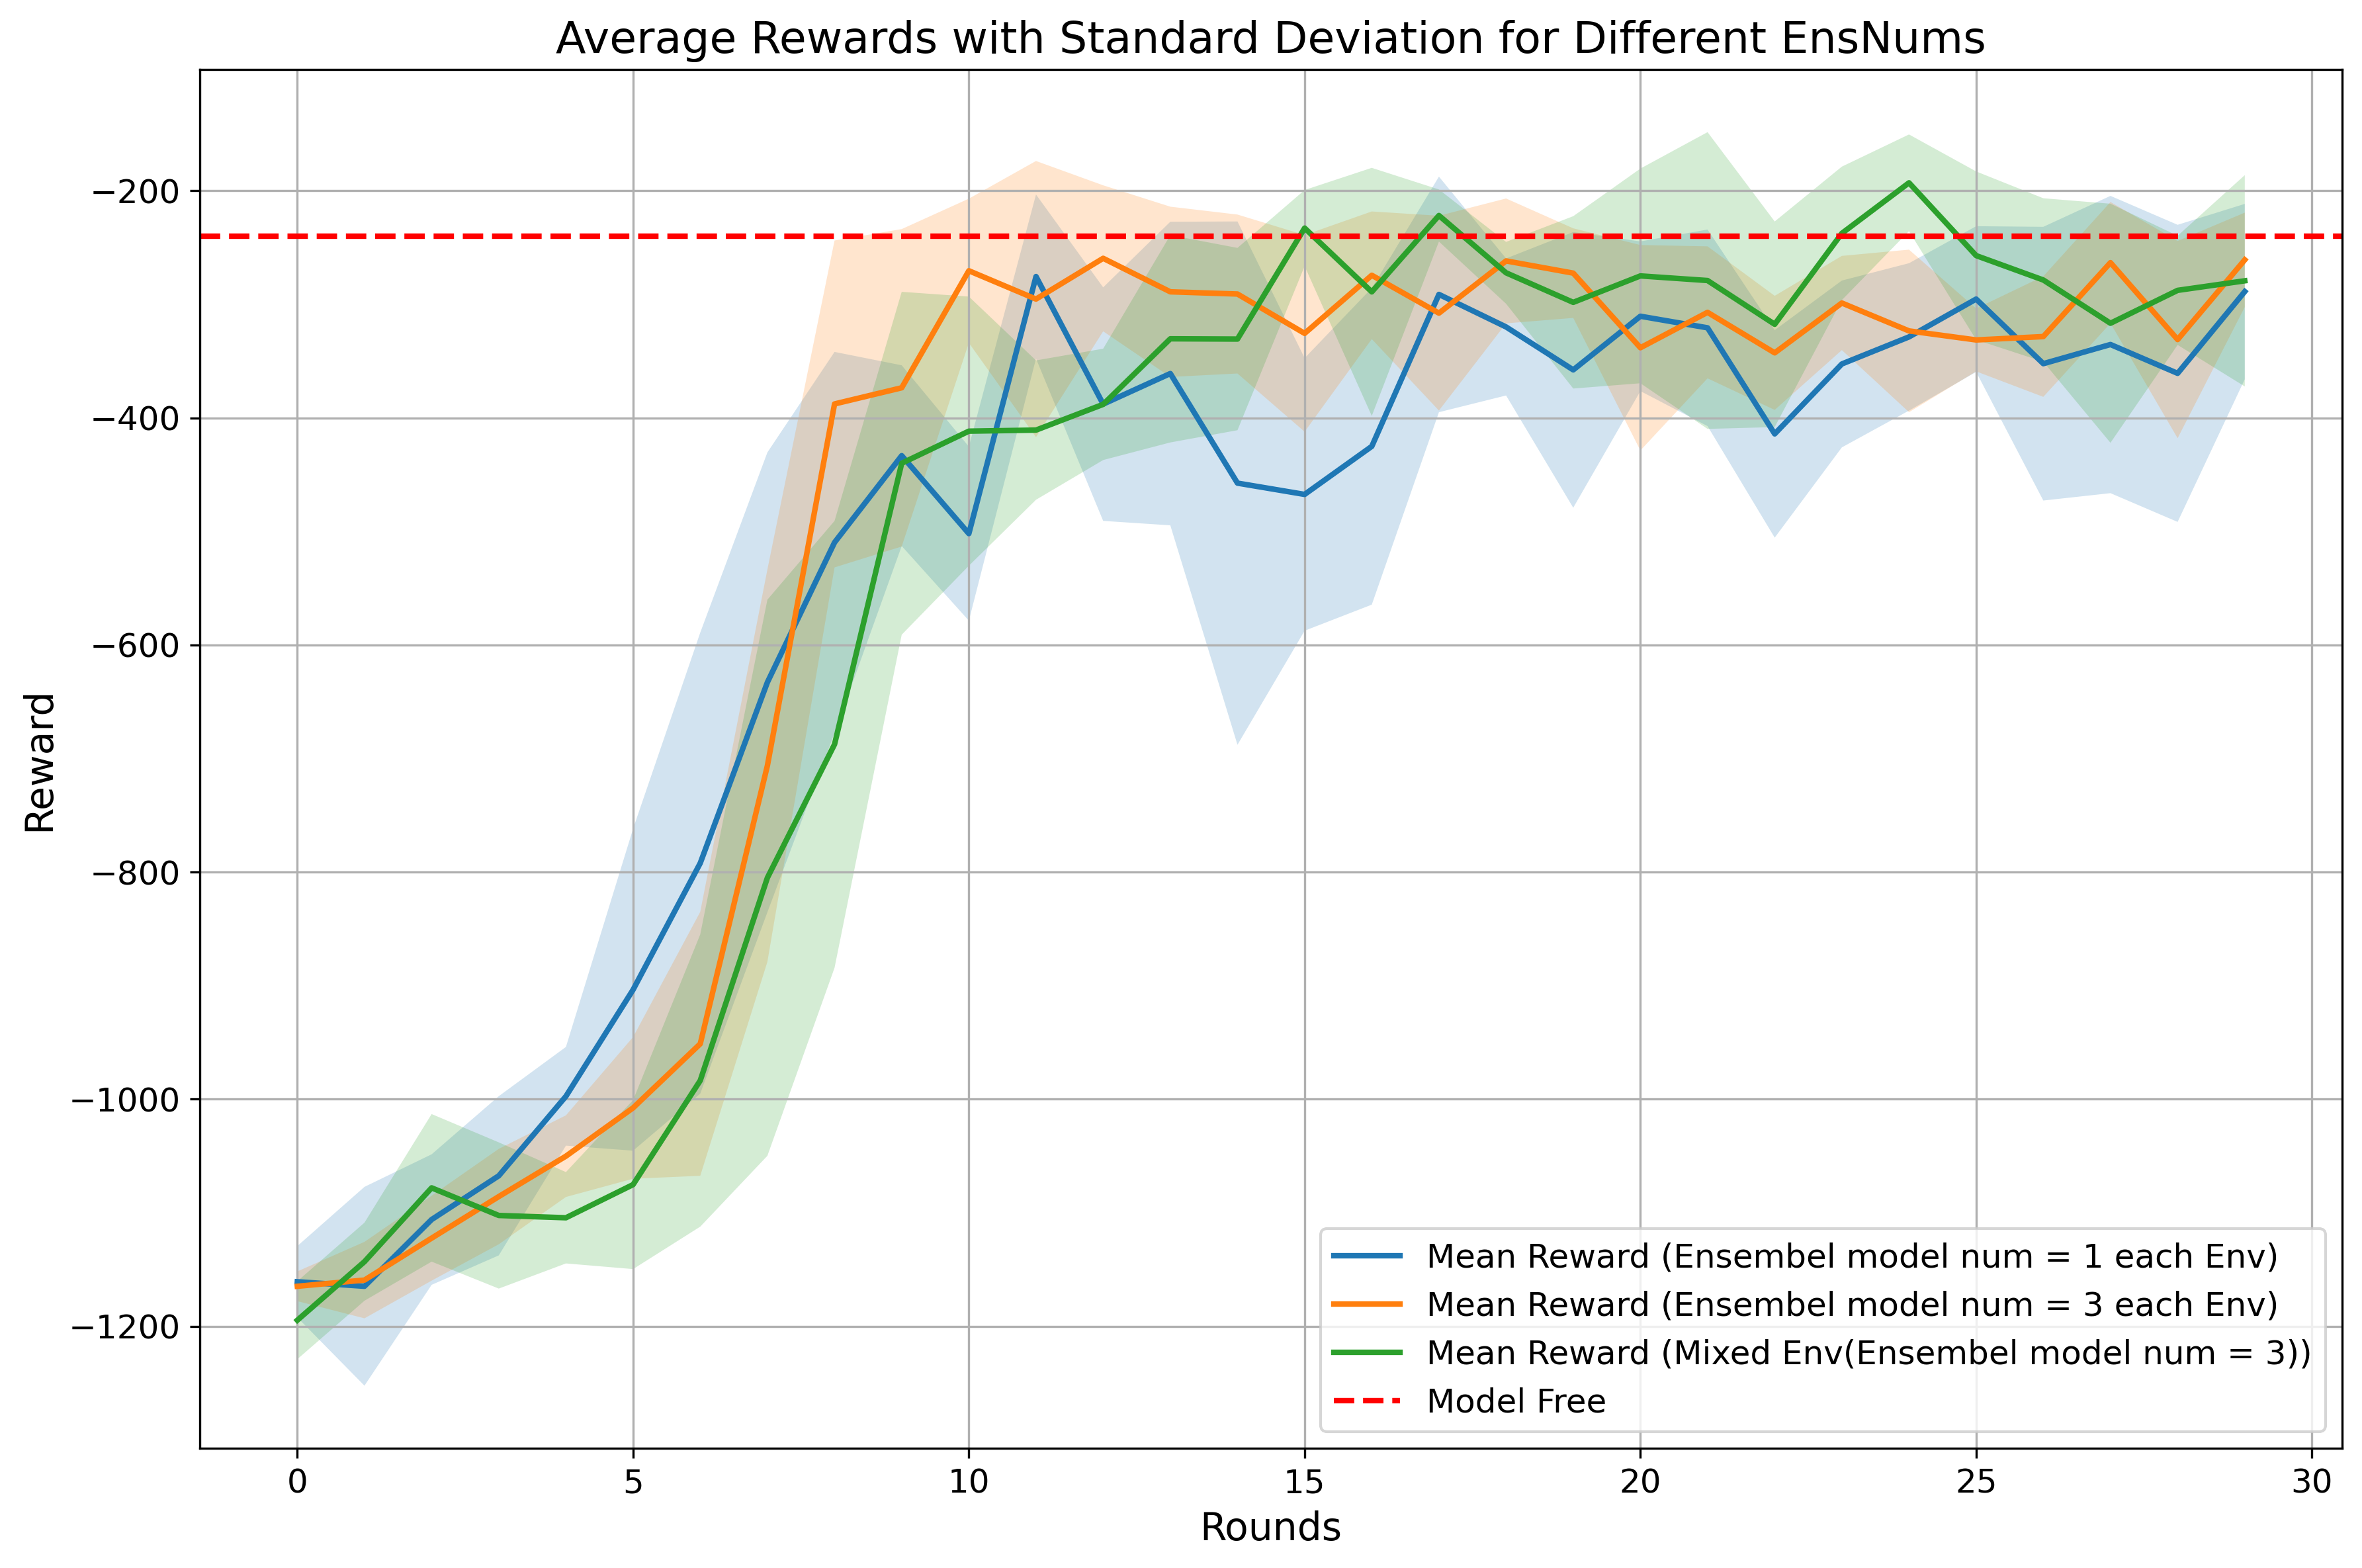

In [26]:
plot_rewards_with_std(rewardsEnsComparison)

# Single

In [58]:
env_num = 3

reward_log_single_ens_1 = []
reward_log_single_ens_3 = []
for env_id in range(env_num):
    singe_log_ens_1 = np.load("Res_H_Env_Pen/Single_EnsNum=1_Env" +str(env_id) +".npy")
    singe_log_ens_3 = np.load("Res_H_Env_Pen/Single_EnsNum=3_Env" +str(env_id) +".npy")
    reward_log_single_ens_1.append(singe_log_ens_1)
    reward_log_single_ens_3.append(singe_log_ens_3)    

In [71]:
def plot_rewards_with_std(rewards_dict, y_limit = 0):
    """
    绘制多个数据集的均值和标准差曲线，并在同一张图上展示。

    参数:
    rewards_dict (dict): 一个字典，其中键为数据集名称，值为形状为 (n_runs, n_rounds) 的数组。
                         每个数组表示多个训练的奖励记录。
    """
    # 设置高分辨率图表
    plt.figure(figsize=(12, 8), dpi=300)

    # 为每个数据集绘制均值和标准差
    for key, env_avg_rewards in rewards_dict.items():
        # 计算均值和方差
        mean_rewards = np.mean(env_avg_rewards, axis=0)
        std_rewards = np.std(env_avg_rewards, axis=0)
        
        # 绘制均值曲线
        plt.plot(mean_rewards, label=f'Mean Reward ({key})', linewidth=2)
        
        # 添加方差阴影
        plt.fill_between(range(len(mean_rewards)), 
                         mean_rewards - std_rewards, 
                         mean_rewards + std_rewards, 
                         alpha=0.2)

    # 添加图例和标签
#     y_limit=-240
    if y_limit != 0:
        plt.axhline(y=y_limit, color='red', linestyle='--', linewidth=2, label=f'Model Free: ' + str(y_limit))
    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Average Rewards with Standard Deviation for Different EnsNums', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # 美化图表
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.ylim(-1000,0)

    # 显示图表
    plt.show()

In [72]:
model_free_log = [-116, -169, -168]

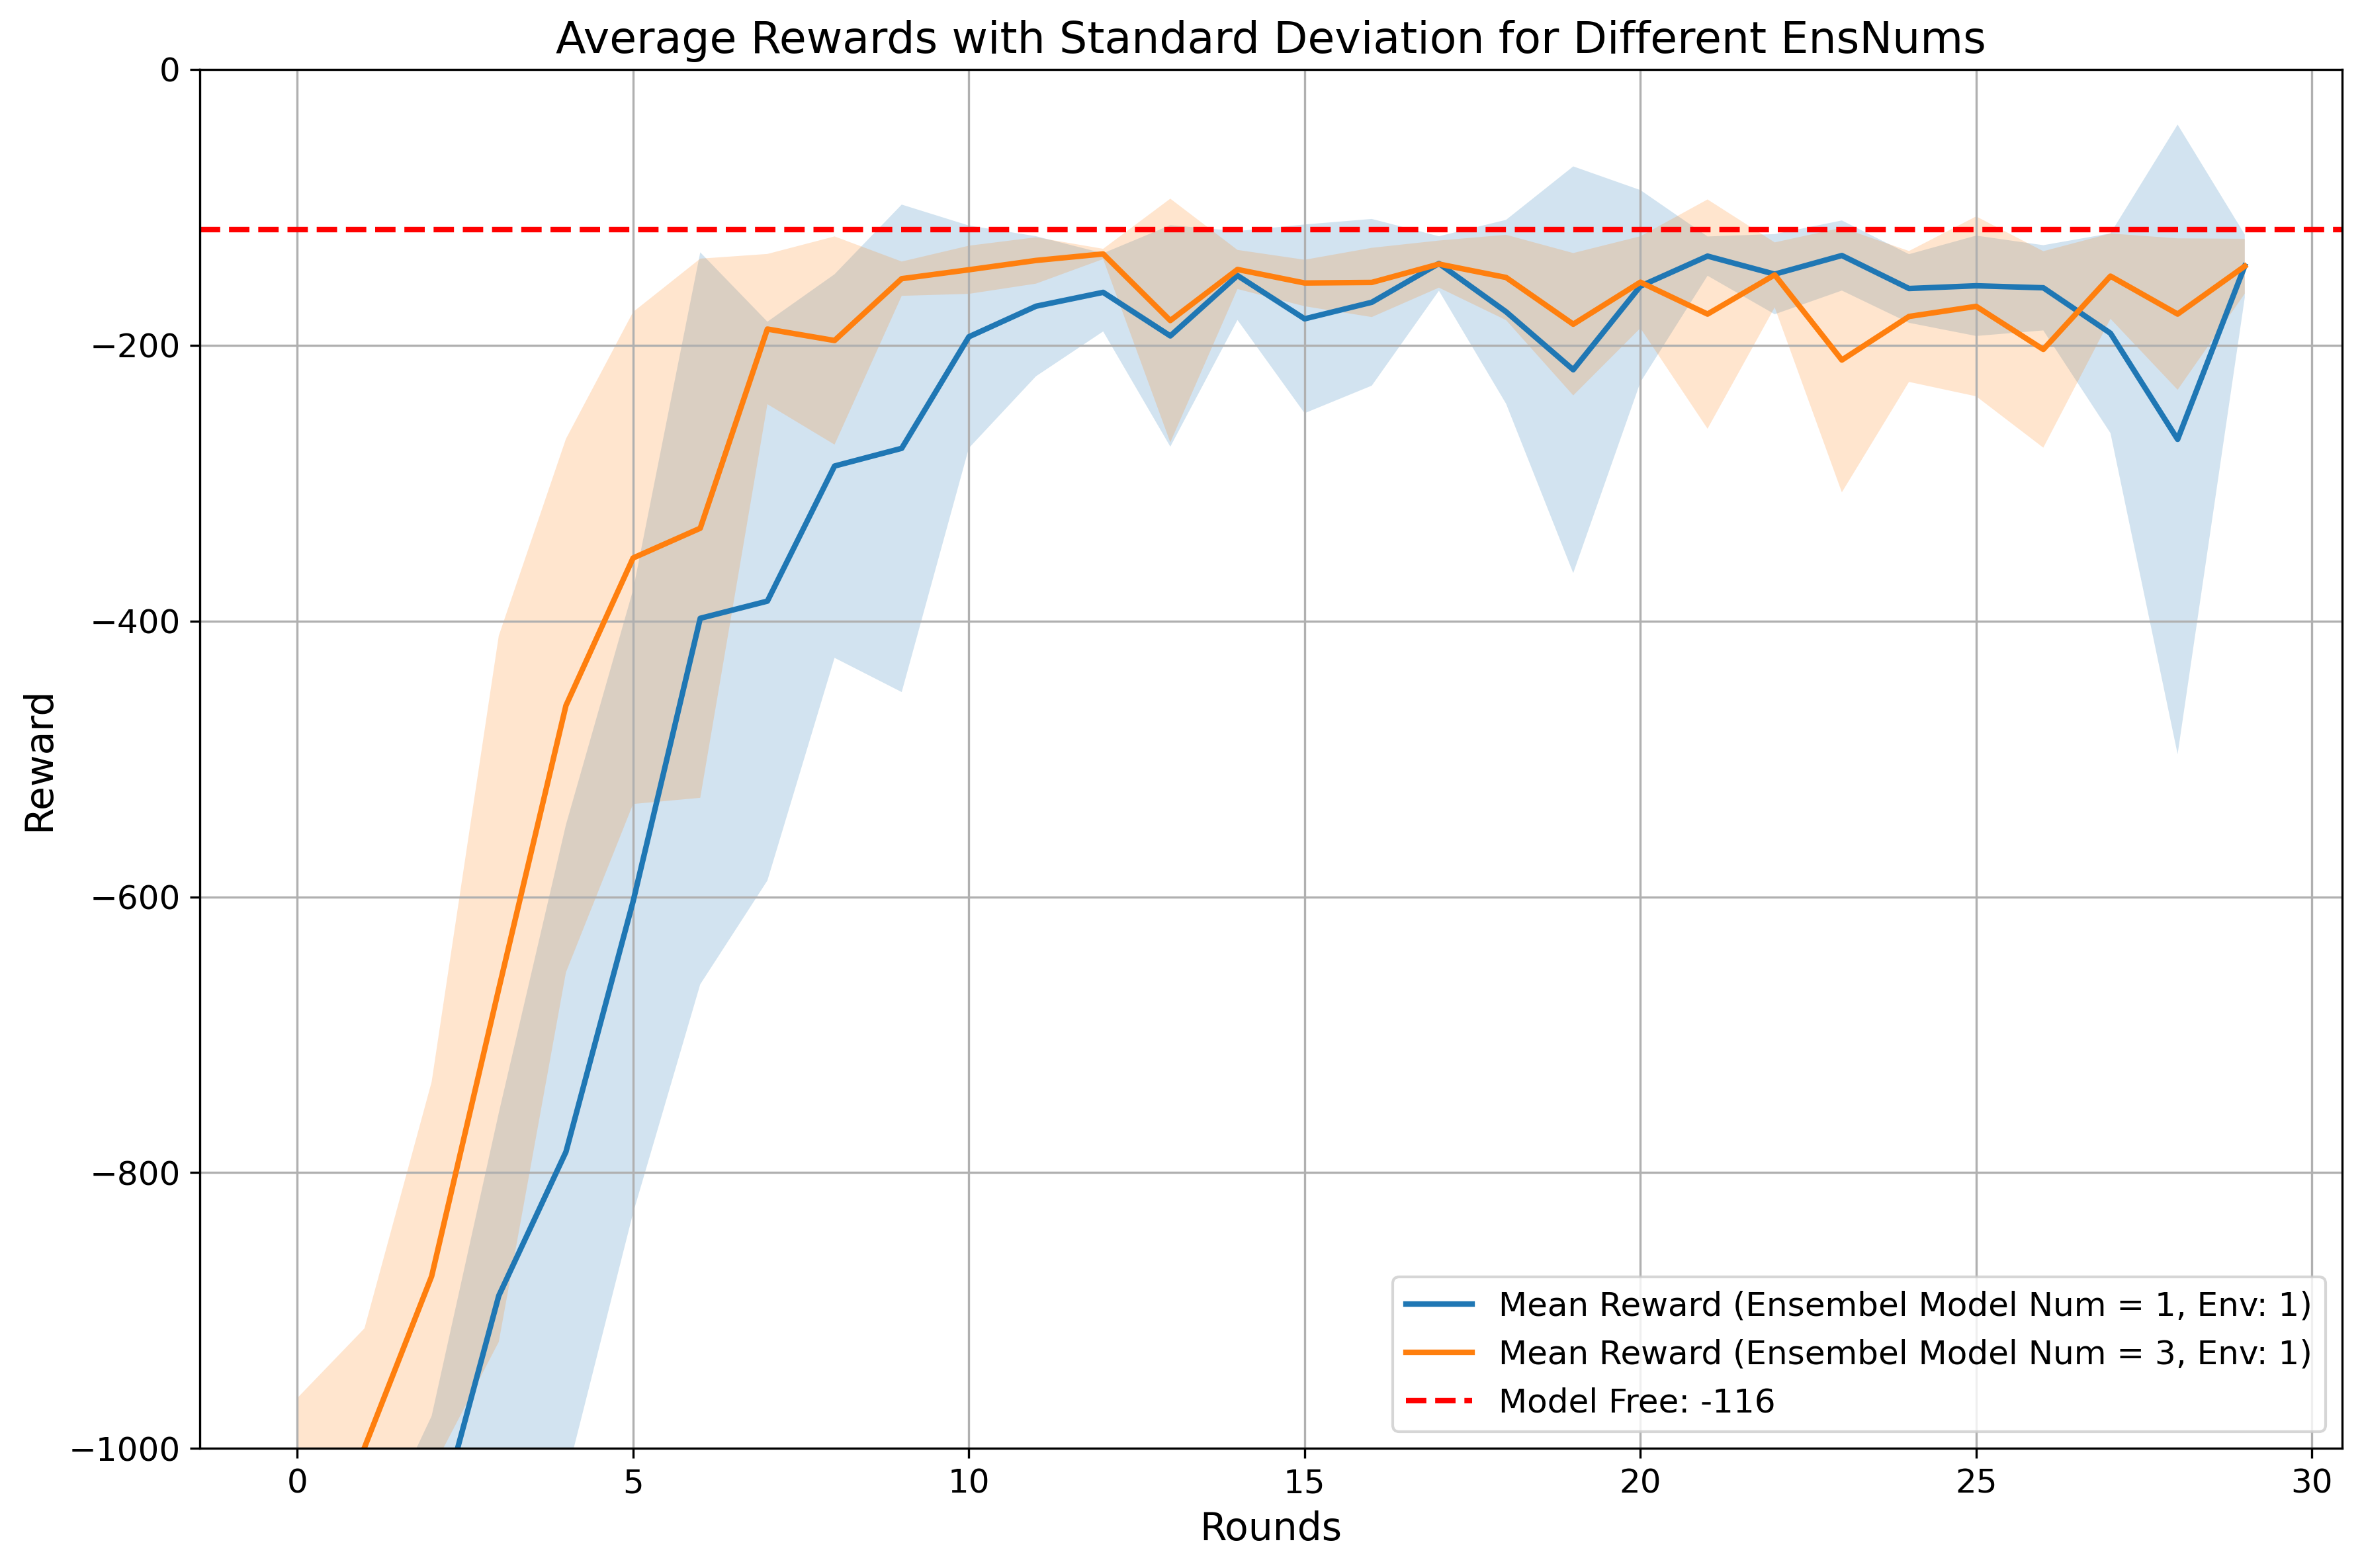

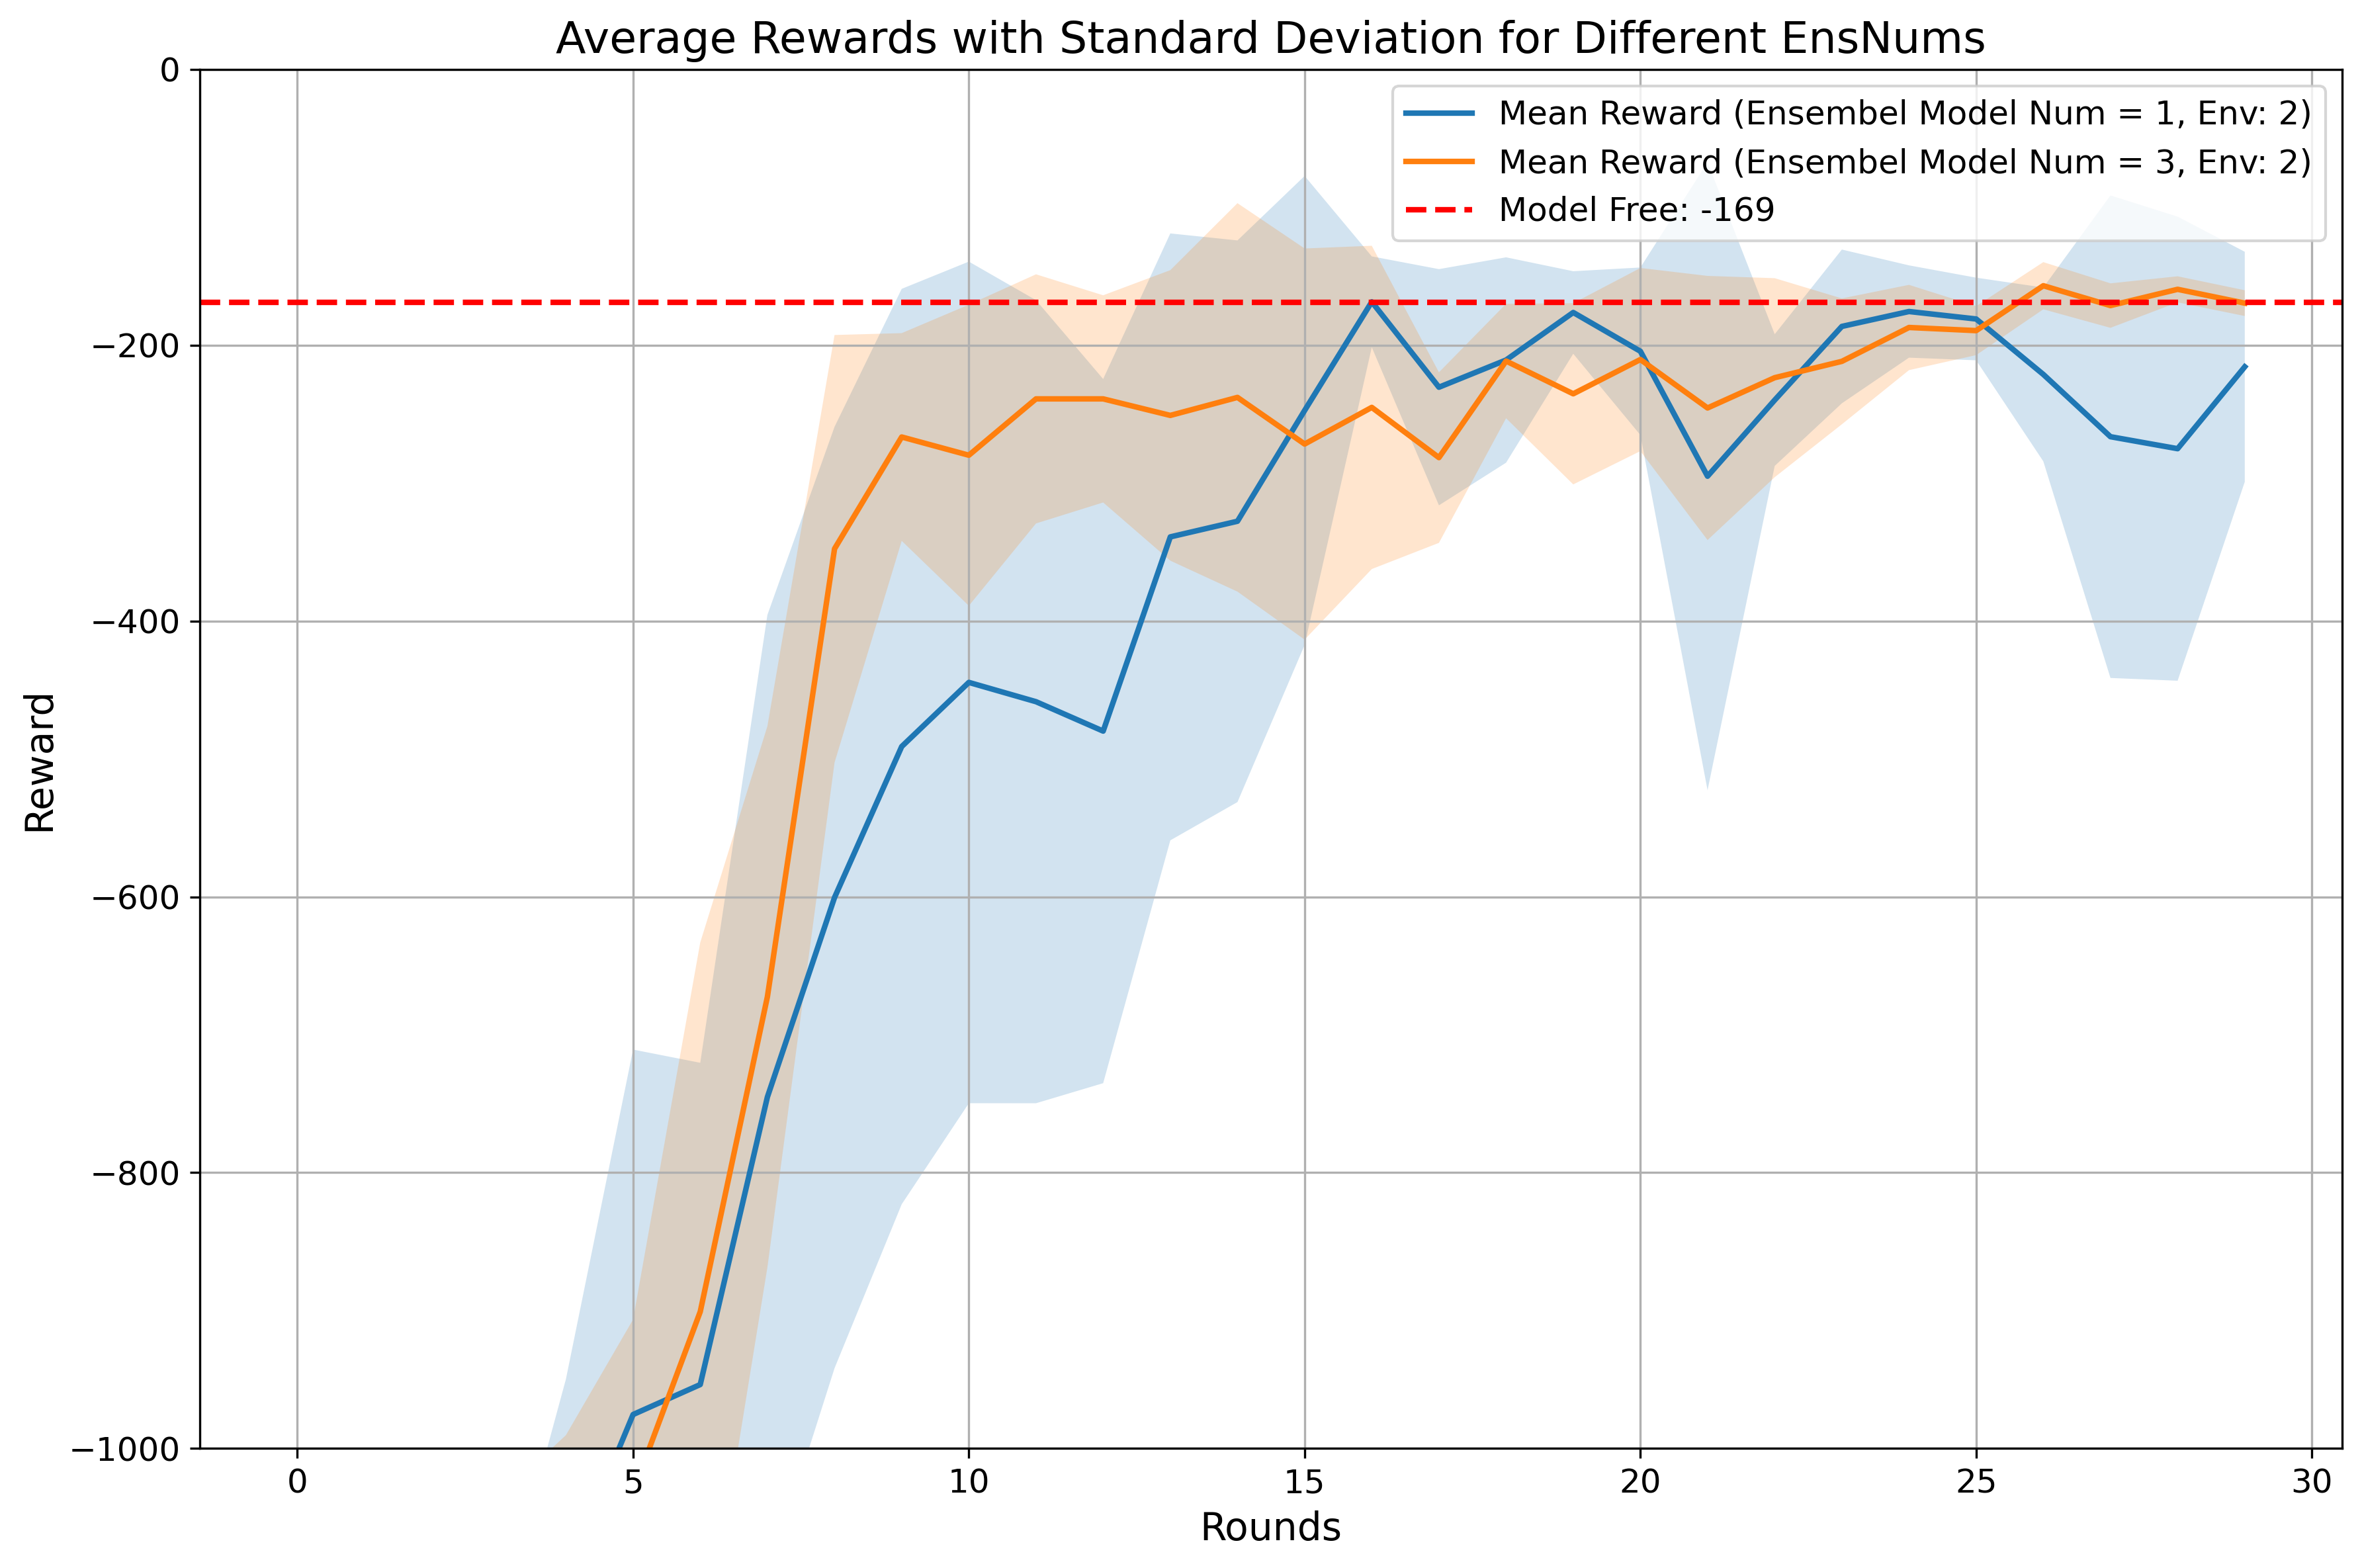

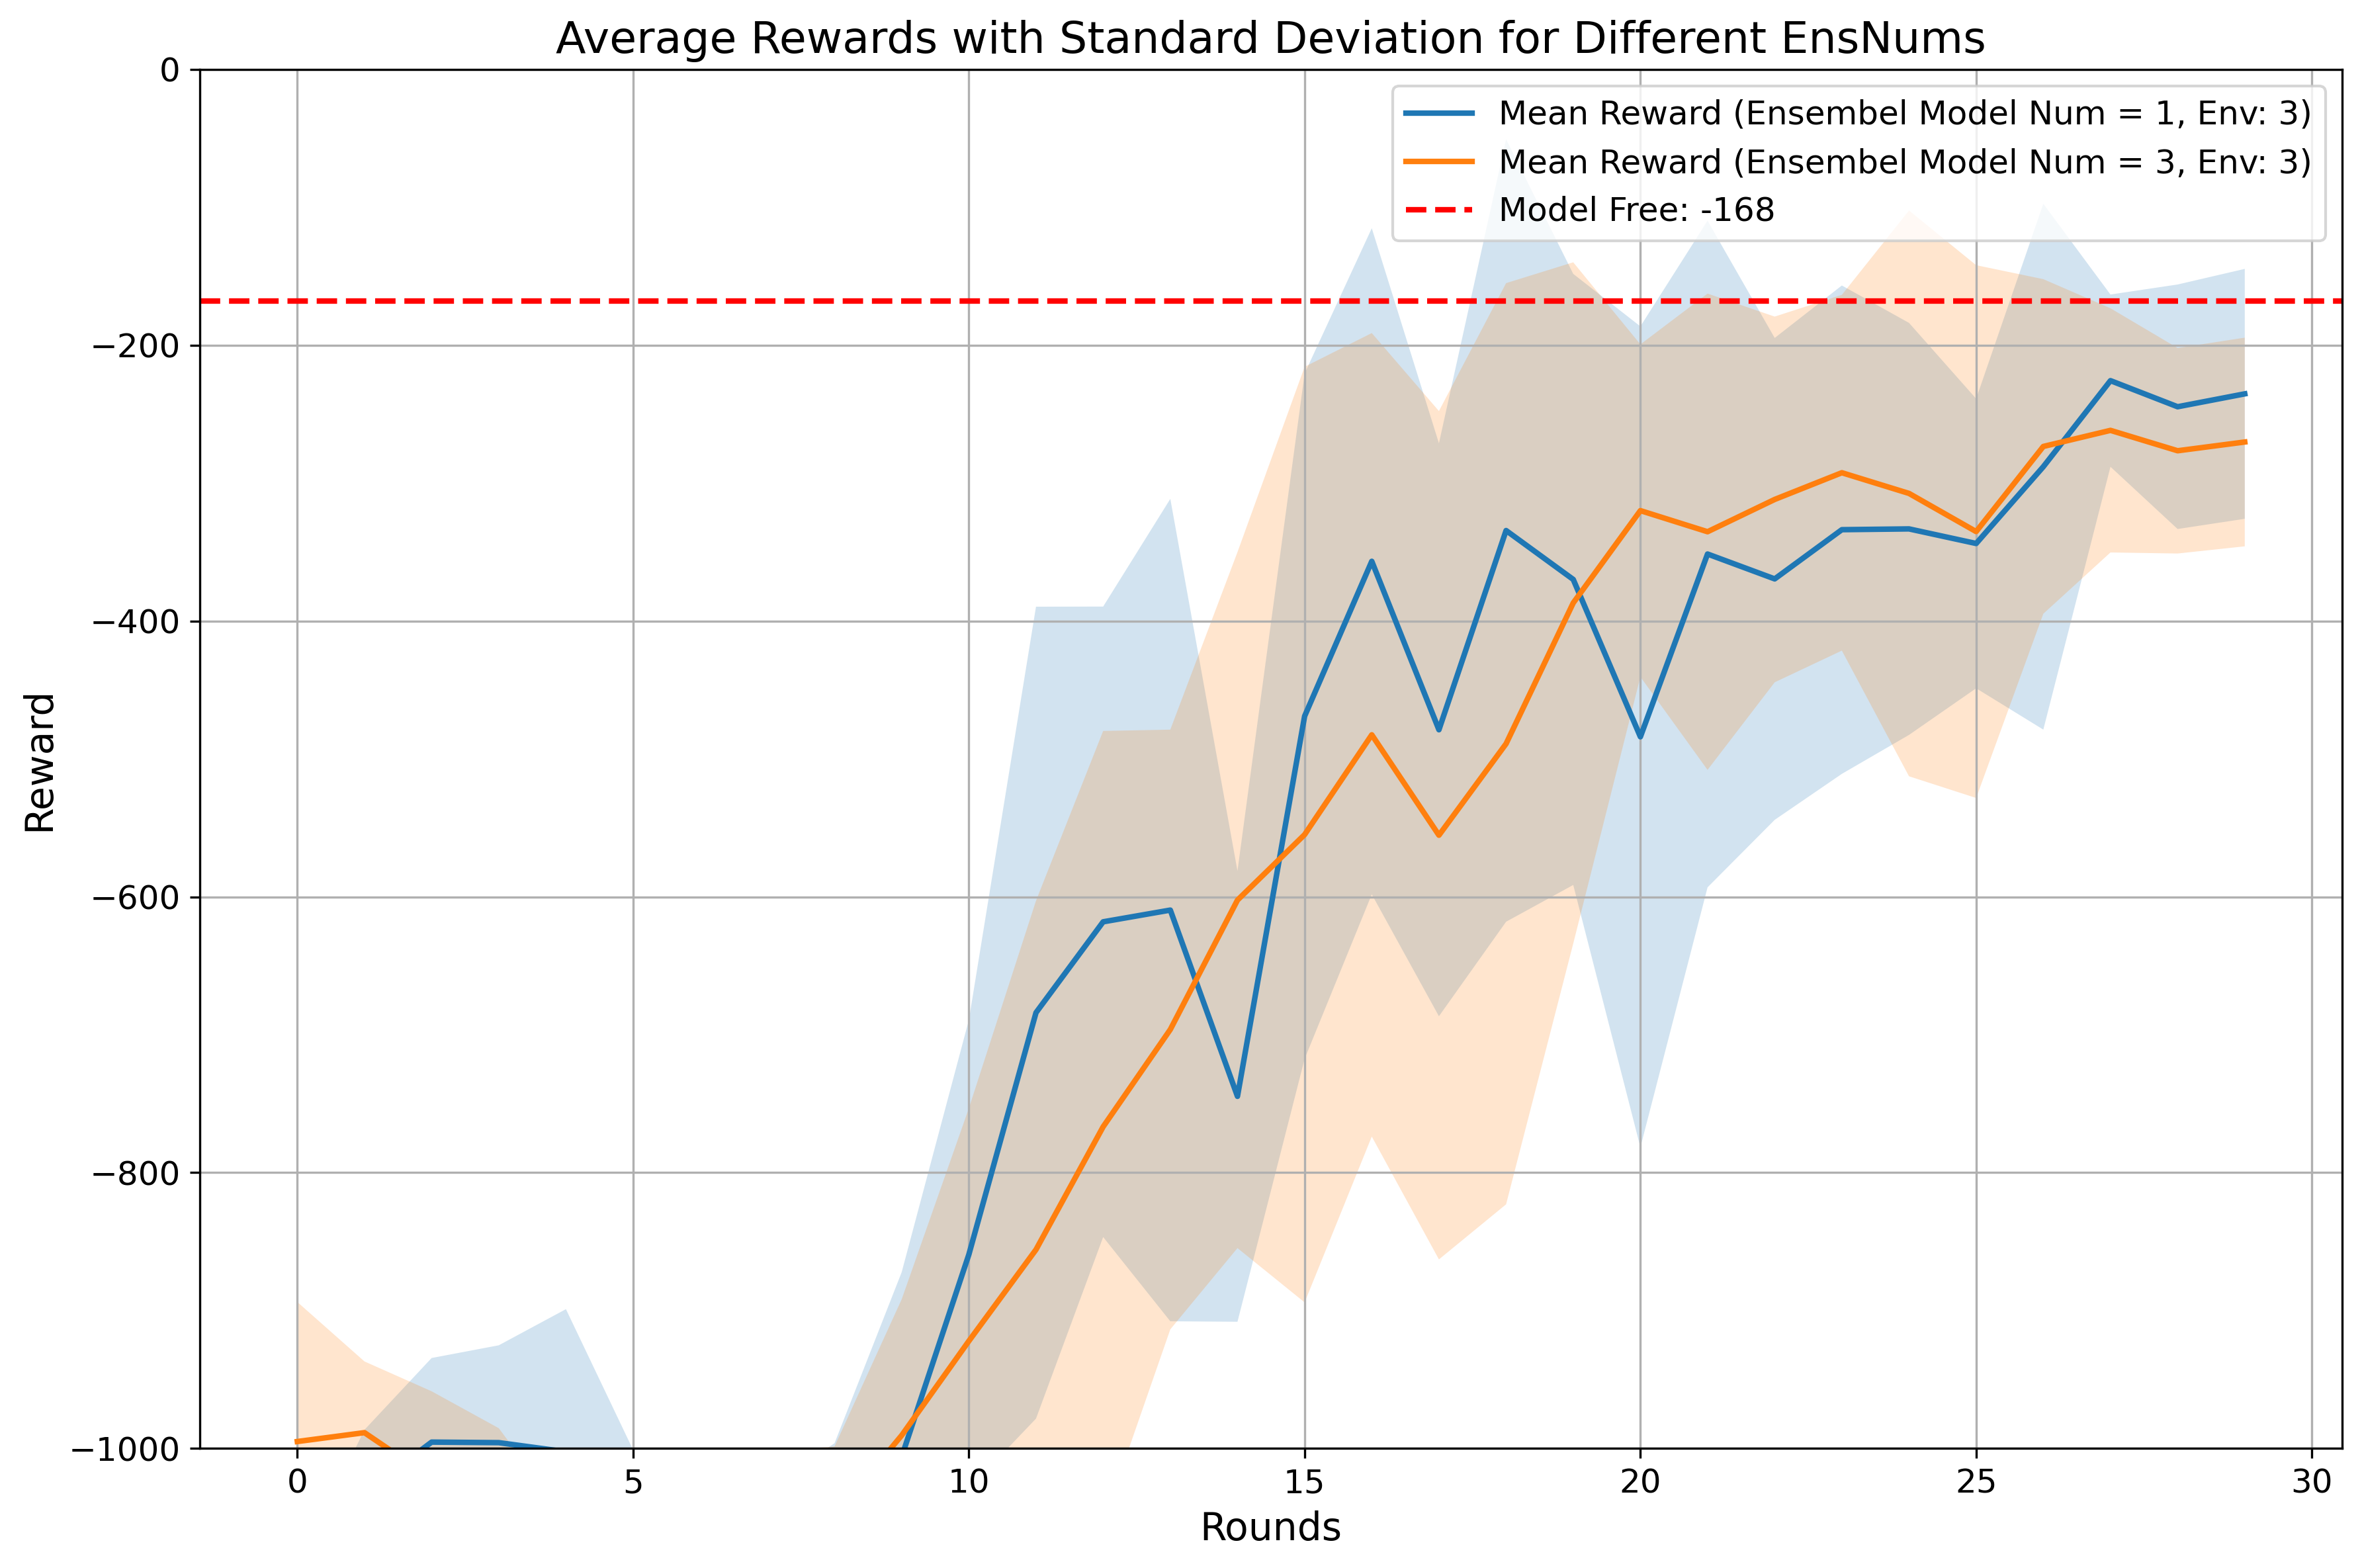

In [73]:
for env_id in range(env_num):
    reward_dict = {"Ensembel Model Num = 1, Env: " + str(env_id + 1): np.squeeze(reward_log_single_ens_1[env_id]),
                  "Ensembel Model Num = 3, Env: " + str(env_id + 1): np.squeeze(reward_log_single_ens_3[env_id])}
    plot_rewards_with_std(reward_dict, model_free_log[env_id])

In [74]:
reward_log_single_ens_1[0].shape

(5, 30, 1)

In [75]:
envMixed_log.shape

(5, 30)

In [52]:
np.squeeze(reward_log_single_ens_1[0])

array([[-1364.09509459, -1169.29566117,  -993.68923023,  -782.34990686,
         -700.67934281,  -386.9429697 ,  -228.45495237,  -398.71207748,
         -225.12397924,  -140.26594238,  -100.12264811,  -133.10450099,
         -109.71129751,  -153.82848089,  -112.72679362,  -225.91008021,
         -153.46875815,  -152.35307188,  -143.20086105,  -131.13219185,
         -112.99714783,  -156.72447774,  -143.58316036,  -113.94238863,
         -196.08332046,  -181.34401488,  -155.43944405,  -184.66168932,
         -141.59298444,  -113.89380609],
       [-1072.43889043, -1065.14224844,  -953.53015358,  -824.7635307 ,
         -510.03310295,  -578.08923297,  -146.18009959,  -120.60155569,
         -116.19095687,  -159.33355379,  -130.89192779,  -169.89147907,
         -160.87693143,  -162.13852919,  -147.1199829 ,  -149.65025639,
         -109.42235181,  -144.04176171,  -126.4868061 ,  -134.12931489,
         -133.12876695,  -123.8224263 ,  -123.63289351,  -126.77549788,
         -123.34374886,